In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def isiterable(obj):
    try:
        iter(obj)
        return True
    except TypeError:
        return False

In [53]:
data = pd.read_csv("/Users/asharifi/Downloads/nba-players-stats/Seasons_Stats.csv")

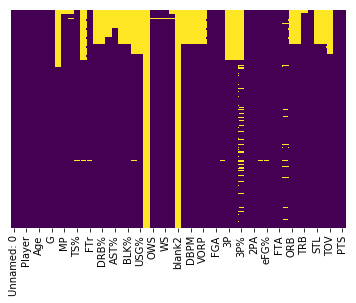

In [4]:
sns.heatmap(data.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')
plt.show()

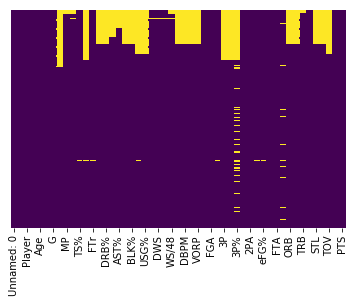

In [5]:
data = data.drop(labels = ["blank2", "blanl"], axis=1)
sns.heatmap(data.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')
plt.show()

In [9]:
print(data[['Player', 'GS']].tail(25))

                  Player    GS
24666   Derrick Williams   0.0
24667       Lou Williams   1.0
24668       Lou Williams   1.0
24669       Lou Williams   0.0
24670    Marvin Williams  76.0
24671    Reggie Williams   0.0
24672      Troy Williams  16.0
24673      Troy Williams  13.0
24674      Troy Williams   3.0
24675       Kyle Wiltjer   0.0
24676    Justise Winslow  15.0
24677        Jeff Withey   1.0
24678     Christian Wood   0.0
24679        Metta World   2.0
24680     Brandan Wright   5.0
24681       Delon Wright   0.0
24682        James Young   0.0
24683          Joe Young   0.0
24684         Nick Young  60.0
24685     Thaddeus Young  74.0
24686        Cody Zeller  58.0
24687       Tyler Zeller   5.0
24688  Stephen Zimmerman   0.0
24689        Paul Zipser  18.0
24690        Ivica Zubac  11.0


In [12]:
print(data[['Year', 'Player', 'GS', 'Tm']].tail(25))

         Year             Player    GS   Tm
24666  2017.0   Derrick Williams   0.0  CLE
24667  2017.0       Lou Williams   1.0  TOT
24668  2017.0       Lou Williams   1.0  LAL
24669  2017.0       Lou Williams   0.0  HOU
24670  2017.0    Marvin Williams  76.0  CHO
24671  2017.0    Reggie Williams   0.0  NOP
24672  2017.0      Troy Williams  16.0  TOT
24673  2017.0      Troy Williams  13.0  MEM
24674  2017.0      Troy Williams   3.0  HOU
24675  2017.0       Kyle Wiltjer   0.0  HOU
24676  2017.0    Justise Winslow  15.0  MIA
24677  2017.0        Jeff Withey   1.0  UTA
24678  2017.0     Christian Wood   0.0  CHO
24679  2017.0        Metta World   2.0  LAL
24680  2017.0     Brandan Wright   5.0  MEM
24681  2017.0       Delon Wright   0.0  TOR
24682  2017.0        James Young   0.0  BOS
24683  2017.0          Joe Young   0.0  IND
24684  2017.0         Nick Young  60.0  LAL
24685  2017.0     Thaddeus Young  74.0  IND
24686  2017.0        Cody Zeller  58.0  CHO
24687  2017.0       Tyler Zeller

In [13]:
data_lou_williams_2017 = data.loc[(data['Player'] == 'Lou Williams') & (data['Year'] == 2017)]

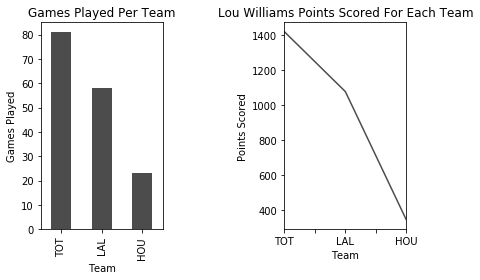

In [16]:
fig,axes = plt.subplots(1,2)
info = pd.Series(data_lou_williams_2017['PTS'].values, index = list(data_lou_williams_2017['Tm']))
info1 = pd.Series(data_lou_williams_2017['G'].values, index = list(data_lou_williams_2017['Tm']))
info1.plot.bar(ax = axes[0], color='k', alpha = 0.7)
info.plot(ax = axes[1], color='k', alpha=0.7)
axes[0].set_title("Games Played Per Team")
axes[0].set_xlabel('Team')
axes[0].set_ylabel('Games Played')
fig.tight_layout()
plt.title("Lou Williams Points Scored For Each Team")
plt.xlabel("Team")
plt.ylabel("Points Scored")
fig.subplots_adjust(wspace = 1)
plt.show()

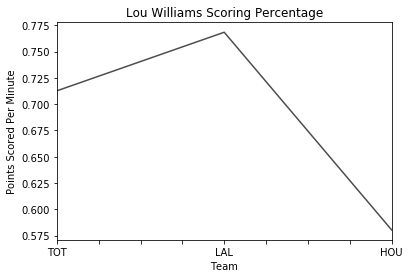

In [18]:
#Let's see how many points Lou Williams scored with respect to
#the number of points he scored with respect to the number of games
info = pd.Series(data_lou_williams_2017['PTS'].values/data_lou_williams_2017['MP'].values, index = list(data_lou_williams_2017['Tm']))
info.plot(color='k', alpha=0.7)
plt.title("Lou William's Scoring Percentage")
plt.xlabel("Team")
plt.ylabel("Points Scored Per Minute")
plt.show()


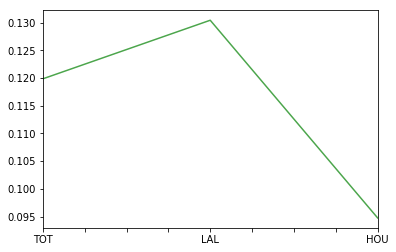

In [22]:
'''
Maybe he performed better with respect to other important aspects
of the game such as TRB, AST, and STL
'''
info = pd.Series(data_lou_williams_2017['AST'].values/data_lou_williams_2017['MP'].values, 
                 index = list(data_lou_williams_2017['Tm']))
info.plot(color = 'g', alpha = 0.7)
plt.show()

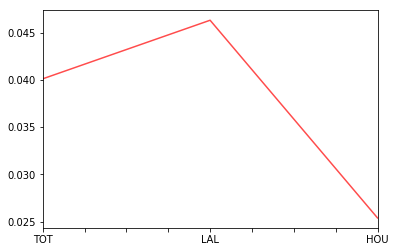

In [24]:
info = pd.Series(data_lou_williams_2017['STL'].values/data_lou_williams_2017['MP'].values, 
                 index = list(data_lou_williams_2017['Tm']))
info.plot(color = 'r', alpha = 0.7)
plt.show()

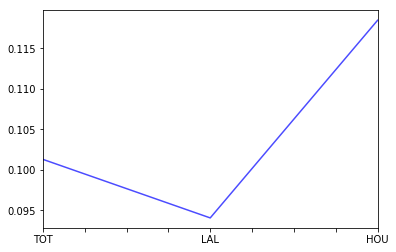

In [27]:
info = pd.Series(data_lou_williams_2017['TRB'].values/data_lou_williams_2017['MP'].values, 
                 index = list(data_lou_williams_2017['Tm']))
info.plot(color = 'b', alpha = 0.7)
plt.show()

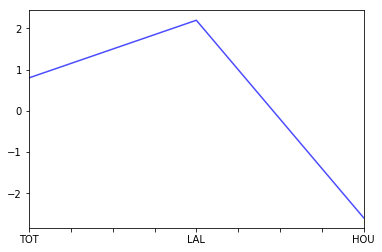

In [28]:
info = pd.Series(data_lou_williams_2017['BPM'].values, index = list(data_lou_williams_2017['Tm']))
info.plot(color = 'b', alpha = 0.7)
plt.show()

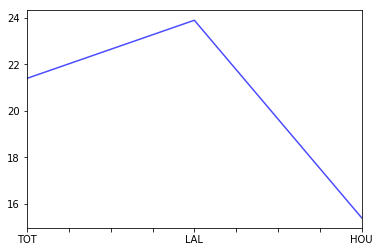

In [29]:
info = pd.Series(data_lou_williams_2017['PER'].values, index = list(data_lou_williams_2017['Tm']))
info.plot(color = 'b', alpha = 0.7)
plt.show()

In [30]:
#there is a bit of chicken and egg argument here
#is it that he's been traded that's caused his stats to drop
#or was he traded because his productivity dropped
#It is difficult to say because players are traded for a variety
#of reasons. Some teams want better players and trade for high-quality
#talent.  Other teams try to get rid of dead-weight and make trades.
#however, is the player's lackluster perofrmance due to their own
#lack of talent or is it due to coaching or other issues.

#however would it fair to say that high-quality talent isn't traded more
#than once in a year?  For example, it would be unreasonable to expect
#that Lebron James is traded more than once in a year.  Or for that matter
#we wouldn't expect any prospect all-star player traded more than once

#let's see if the data agrees or disagrees with me.

#let's look at the past 5 years and see if all-start talent players
#are traded more than once each year

players_2017 = data.loc[(data['Year'] == 2017)]
print(players_2017)

'''
now the problem with this dataset is that it includes players
that were traded. In other words, players that were traded
will appear n times, where n is the number of times they have
been traded.  But we will ignore that for now.
'''



       Unnamed: 0    Year                 Player Pos   Age   Tm     G    GS  \
24096       24096  2017.0           Alex Abrines  SG  23.0  OKC  68.0   6.0   
24097       24097  2017.0             Quincy Acy  PF  26.0  TOT  38.0   1.0   
24098       24098  2017.0             Quincy Acy  PF  26.0  DAL   6.0   0.0   
24099       24099  2017.0             Quincy Acy  PF  26.0  BRK  32.0   1.0   
24100       24100  2017.0           Steven Adams   C  23.0  OKC  80.0  80.0   
24101       24101  2017.0          Arron Afflalo  SG  31.0  SAC  61.0  45.0   
24102       24102  2017.0          Alexis Ajinca   C  28.0  NOP  39.0  15.0   
24103       24103  2017.0           Cole Aldrich   C  28.0  MIN  62.0   0.0   
24104       24104  2017.0      LaMarcus Aldridge  PF  31.0  SAS  72.0  72.0   
24105       24105  2017.0            Lavoy Allen  PF  27.0  IND  61.0   5.0   
24106       24106  2017.0             Tony Allen  SG  35.0  MEM  71.0  66.0   
24107       24107  2017.0        Al-Farouq Aminu  SF

In [42]:
players_2017_frame = pd.DataFrame(index = players_2017, columns=players_2017.columns)

In [44]:
print(players_2017_frame.columns)

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


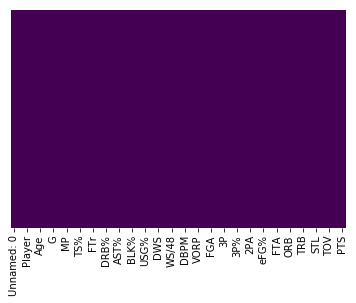

In [45]:
sns.heatmap(players_2017_frame.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')
plt.show()

In [48]:
#players_2017_frame.sort_values(by=players_2017_frame['PER'])
print(any(players_2017_frame['Unnamed: 0'].duplicated())) 


True


In [54]:
#add unique identifier to the table
#so you can sort the table by the unique id according to PER